# Guided project 4

The purpose of this project is to explore how to use pandas plotting for quickly explore data using visualizations.
The dataset used represents the job outcomes of students who graduated from college between 2010 and 2012. The original data was released by the American Community Survey. It can be found in the Github repo of FiveThirtyEight [here](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

A few of the questions to be answered:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Prefominantly female?
- Which category of majors have the most students?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [5]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [6]:
recent_grads = recent_grads.dropna()

In [7]:
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours

# part 2 - Pandas, Scatter Plots

- test example

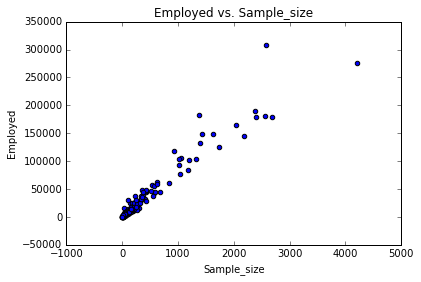

In [8]:
#recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size');

In [9]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

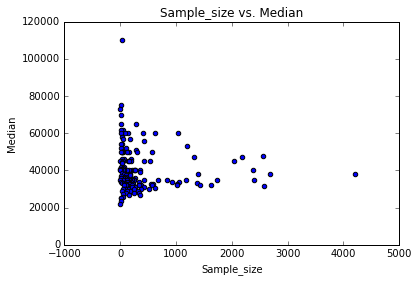

In [10]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Sample_size vs. Median');

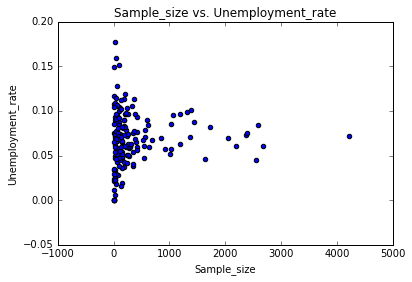

In [11]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample_size vs. Unemployment_rate');

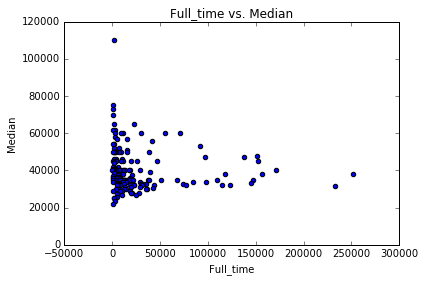

In [12]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full_time vs. Median');

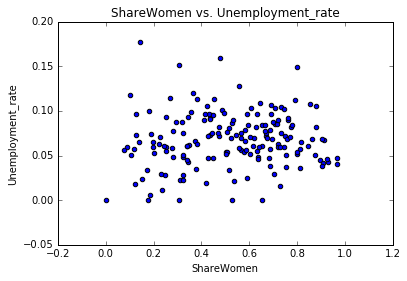

In [13]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('ShareWomen vs. Unemployment_rate');

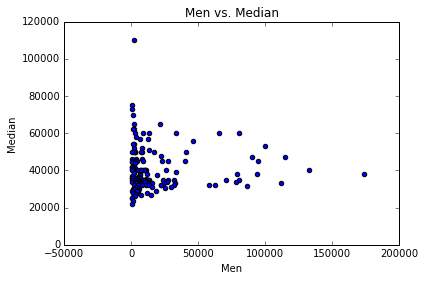

In [14]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs. Median');

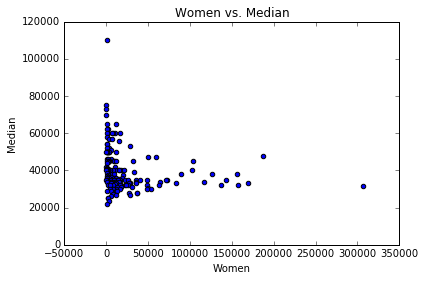

In [15]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('Women vs. Median');

# Part 3 - Pandas, Histograms

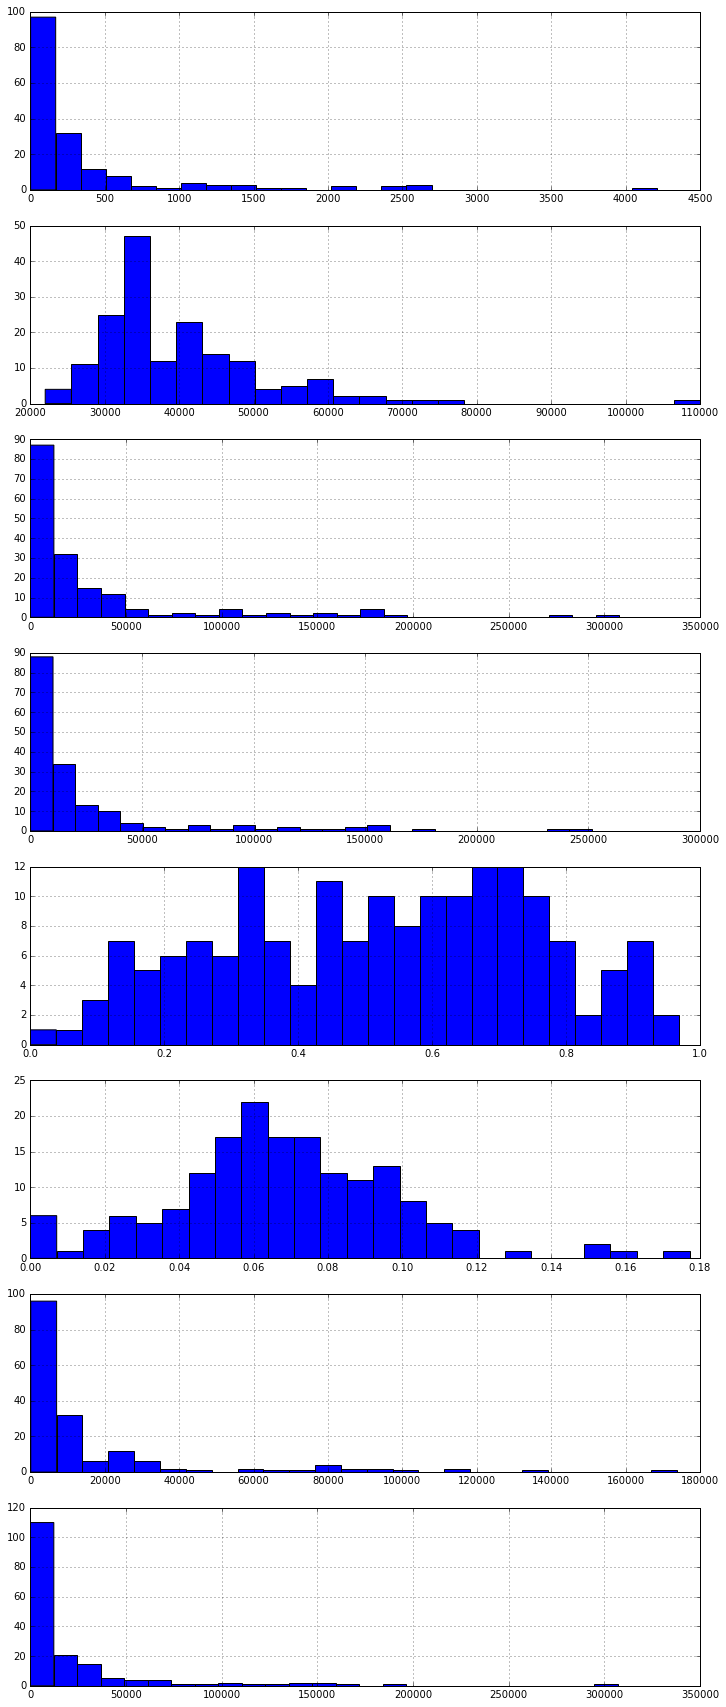

In [16]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(12,30));

for i in range(0,8):
    ax = fig.add_subplot(8,1,i+1)
    ax = recent_grads[cols[i]].hist(bins=25)


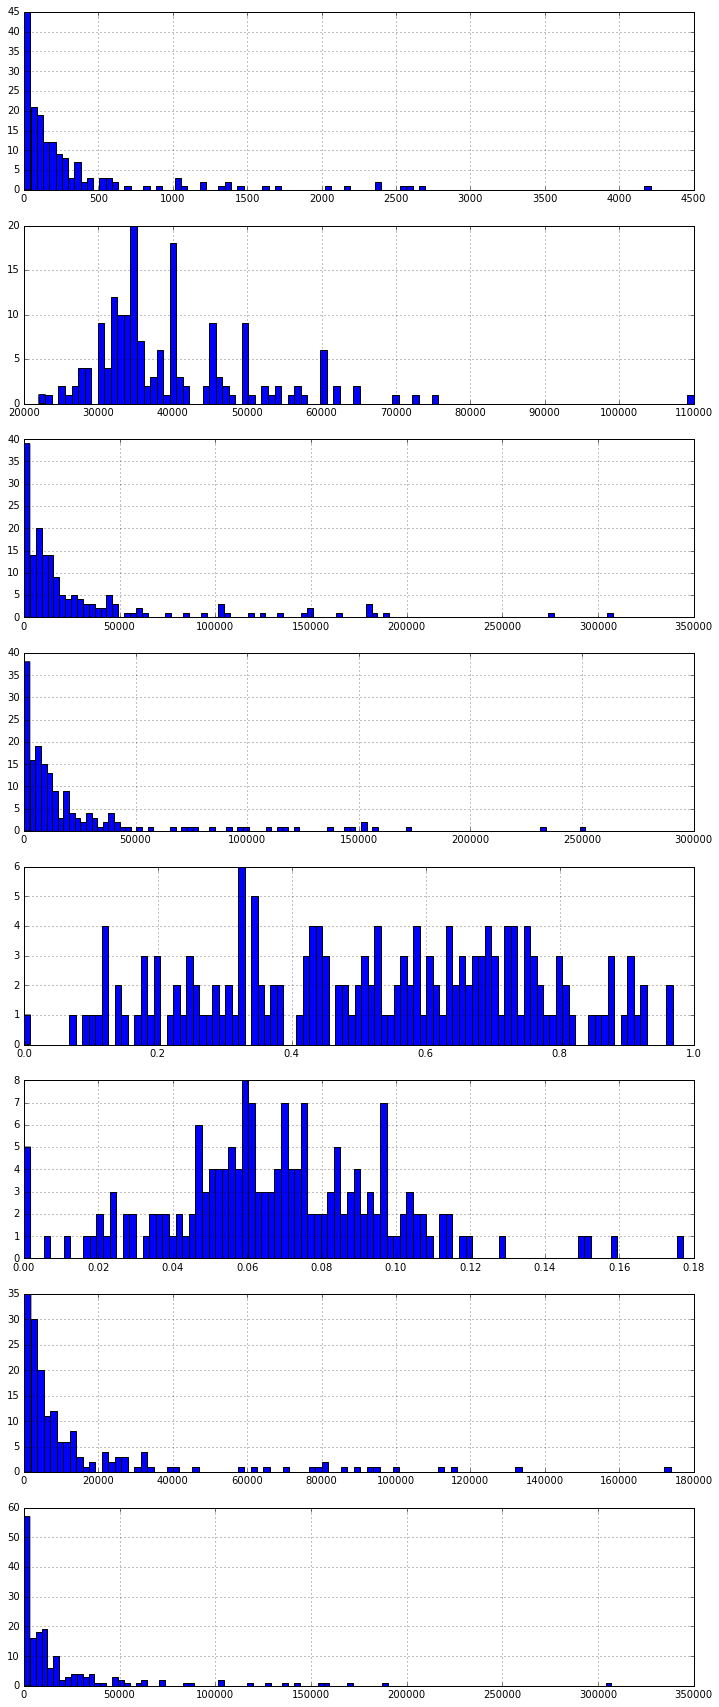

In [17]:
fig = plt.figure(figsize=(12,30));

for i in range(0,8):
    ax = fig.add_subplot(8,1,i+1)
    ax = recent_grads[cols[i]].hist(bins=100)

# Part 4 - Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9821806e80>,
      dtype=object)

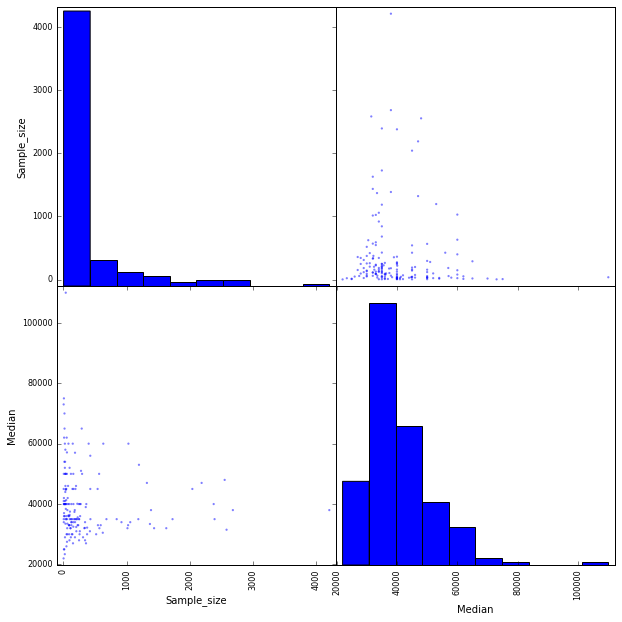

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10));

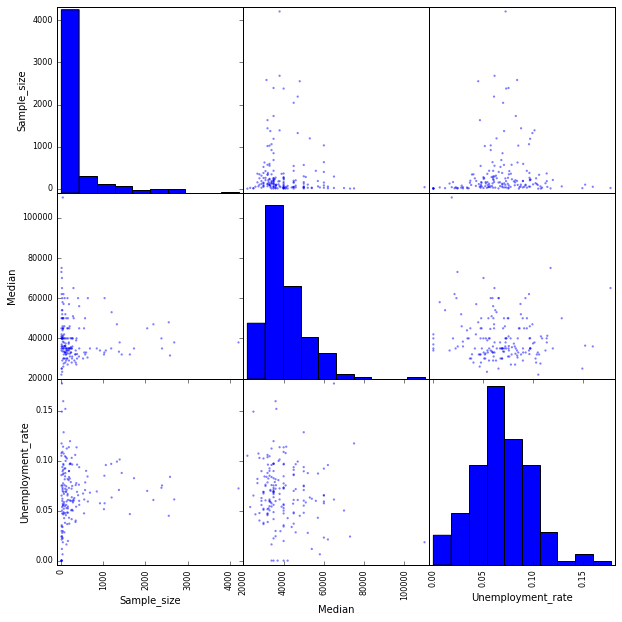

In [19]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10));

# Part 5 - Pandas, Bar Plots

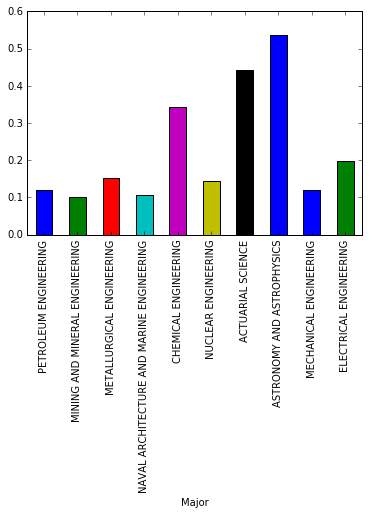

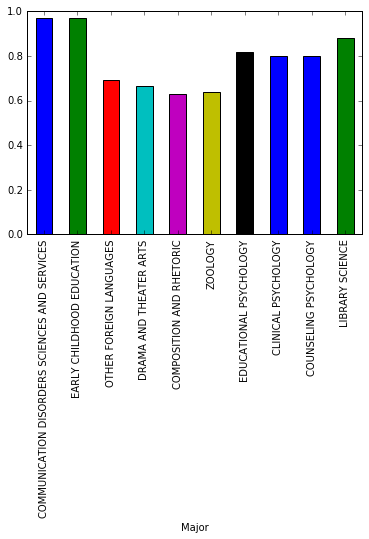

In [29]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)